In [202]:
import pandas as pd
import numpy as np
import json
import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import factorial

In [203]:
df = pd.read_csv('trump.csv')
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,I will be announcing my Second Term Presidenti...,5/31/19 20:35,35772.0,130344.0,False,1.134560e+18
1,Twitter Media Studio,GREAT NEWS! #MAGA https://t.co/91Yk8B11bP,5/31/19 20:02,20786.0,77068.0,False,1.134550e+18
2,Twitter for iPhone,As we celebrate LGBT Pride Month and recognize...,5/31/19 19:12,29309.0,139131.0,False,1.134540e+18
3,Twitter for iPhone,....on the basis of their sexual orientation. ...,5/31/19 19:12,20645.0,107414.0,False,1.134540e+18
4,Twitter for iPhone,.@SeanHannity is having a DEEP STATE SHOW toni...,5/31/19 18:11,18273.0,66157.0,False,1.134520e+18


In [204]:
list(df.columns)

['source',
 'text',
 'created_at',
 'retweet_count',
 'favorite_count',
 'is_retweet',
 'id_str']

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8173 entries, 0 to 8172
Data columns (total 7 columns):
source            8173 non-null object
text              8173 non-null object
created_at        8171 non-null object
retweet_count     8171 non-null float64
favorite_count    8171 non-null float64
is_retweet        8113 non-null object
id_str            8171 non-null float64
dtypes: float64(3), object(4)
memory usage: 447.0+ KB


In [206]:
df = df.dropna(axis=0)

In [207]:
def dateclean(x):
    string = str(x)
    date_object = datetime.datetime.strptime(string, "%m/%d/%y %H:%M")
    return date_object
    

In [208]:
df['created_at'] = df['created_at'].apply(lambda x: dateclean(x))

In [209]:
def date_pop(date_object):
    return date_object.date()
    

In [210]:
df['date'] = df.created_at.apply(date_pop)

In [211]:
def time_pop(date_object):
    return date_object.time()
   

In [212]:
df['time'] = df.created_at.apply(time_pop)

In [213]:
df.drop(columns=['created_at'], inplace=True)

In [214]:
df.shape

(8113, 8)

In [215]:
df.time.isna().value_counts()

False    8113
Name: time, dtype: int64

In [216]:
df['hour']= df['time'].apply(lambda x: x.hour)

In [217]:
df.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str,date,time,hour
0,Twitter for iPhone,I will be announcing my Second Term Presidenti...,35772.0,130344.0,False,1.134560e+18,2019-05-31,20:35:00,20
1,Twitter Media Studio,GREAT NEWS! #MAGA https://t.co/91Yk8B11bP,20786.0,77068.0,False,1.134550e+18,2019-05-31,20:02:00,20
2,Twitter for iPhone,As we celebrate LGBT Pride Month and recognize...,29309.0,139131.0,False,1.134540e+18,2019-05-31,19:12:00,19
3,Twitter for iPhone,....on the basis of their sexual orientation. ...,20645.0,107414.0,False,1.134540e+18,2019-05-31,19:12:00,19
4,Twitter for iPhone,.@SeanHannity is having a DEEP STATE SHOW toni...,18273.0,66157.0,False,1.134520e+18,2019-05-31,18:11:00,18


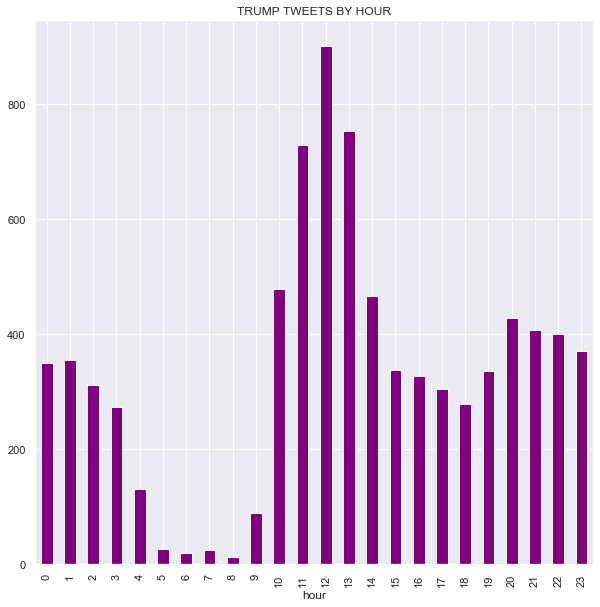

In [218]:
df.groupby(['hour'])['id_str'].count().plot.bar(color='purple',figsize=(10,10),title="TRUMP TWEETS BY HOUR")

In [219]:
#df.to_csv(r'~/Code/blog_projects/trump_tweets_clean.csv')

Trump is not always in the same time zone and tweets are probably written by his staff at times, to get a better understanding I will use his leaked schedule.

In [220]:
sched_df = pd.read_csv('axios.csv')

In [221]:
sched_df.head()

,week,date,time_start,time_end,duration,listed_title,top_category,listed_location,listed_project_officer,detail_category,notes
0,1,2018-11-07,08:00,11:00,3.0,Executive time,executive_time,Oval office,NaN,executive_time,NaN
1,1,2018-11-07,11:00,11:30,0.5,Meeting with the chief of staff,meeting,Oval office,NaN,cos_meeting,NaN
2,1,2018-11-07,11:30,12:30,1.0,Executive time,executive_time,Oval office,NaN,executive_time,NaN
3,1,2018-11-07,12:30,13:30,1.0,Lunch,lunch,Private dining room,NaN,solo_lunch,NaN
4,1,2018-11-07,13:30,17:00,3.5,Executive time,executive_time,Oval office,NaN,executive_time,NaN


In [222]:
sched_df.drop(columns=['listed_project_officer', 'detail_category','notes'], inplace=True)

In [223]:
list(sched_df.columns)

['week',
 'date',
 'time_start',
 'time_end',
 'duration',
 'listed_title',
 'top_category',
 'listed_location']

In [224]:
startdate = sched_df.date.min()
startdate

'2018-11-07'

In [225]:
enddate = sched_df.date.max()
enddate

'2019-02-01'

In [226]:
df['date'] = pd.to_datetime(df['date'])  

In [227]:
mask = (df['date'] >= startdate) & (df['date'] <= enddate)

In [228]:
leak_df = df.loc[mask]

In [229]:
sched_df = sched_df.reset_index(drop=True)

In [230]:
leak_df['date'] = leak_df['date'].astype(str)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [231]:
sched_df['time_start']=pd.to_datetime(sched_df['time_start'])
sched_df['time_start'] = [time.time() for time in sched_df['time_start']]
sched_df['time_end']=pd.to_datetime(sched_df['time_end'])
sched_df['time_end'] = [time.time() for time in sched_df['time_end']]

In [232]:
leak_df = leak_df.sort_values(by='date')

In [233]:
sched_df = sched_df.sort_values(by='date')

In [234]:
sched_df = sched_df.set_index('date')

In [235]:
tweet_df = leak_df.join(sched_df, how='left', on='date')

In [236]:
tweet_df = tweet_df.reset_index()


In [237]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 17 columns):
index              6228 non-null int64
source             6228 non-null object
text               6228 non-null object
retweet_count      6228 non-null float64
favorite_count     6228 non-null float64
is_retweet         6228 non-null object
id_str             6228 non-null float64
date               6228 non-null object
time               6228 non-null object
hour               6228 non-null int64
week               5985 non-null float64
time_start         5985 non-null object
time_end           5985 non-null object
duration           5875 non-null float64
listed_title       5875 non-null object
top_category       5985 non-null object
listed_location    5000 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 827.2+ KB


In [238]:
tweet_df = tweet_df[tweet_df['time'] > tweet_df['time_start']]

In [239]:
tweet_df = tweet_df[tweet_df['time'] < tweet_df['time_end']]

In [240]:
tweet_df = tweet_df.drop(columns='index')

In [241]:
tweet_df = tweet_df.reset_index(drop=True)

In [242]:
tweet_df.listed_location.fillna(tweet_df.top_category, inplace=True)

In [243]:
tweet_df.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str,date,time,hour,week,time_start,time_end,duration,listed_title,top_category,listed_location
0,Twitter for iPhone,According to NBC News Voters Nationwide Disapp...,28199.0,122357.0,False,1.060190e+18,2018-11-07,15:39:00,15,1.0,13:30:00,17:00:00,3.5,Executive time,executive_time,Oval office
1,Twitter for iPhone,In all fairness Nancy Pelosi deserves to be ch...,18157.0,88740.0,False,1.060160e+18,2018-11-07,13:31:00,13,1.0,13:30:00,17:00:00,3.5,Executive time,executive_time,Oval office
2,Twitter for iPhone,If the Democrats think they are going to waste...,45878.0,177925.0,False,1.060160e+18,2018-11-07,13:04:00,13,1.0,12:30:00,13:30:00,1.0,Lunch,lunch,Private dining room
3,Twitter for iPhone,To any of the pundits or talking heads that do...,29074.0,138690.0,False,1.060150e+18,2018-11-07,12:52:00,12,1.0,12:30:00,13:30:00,1.0,Lunch,lunch,Private dining room
4,Twitter for iPhone,Those that worked with me in this incredible M...,24165.0,109847.0,False,1.060140e+18,2018-11-07,12:07:00,12,1.0,11:30:00,12:30:00,1.0,Executive time,executive_time,Oval office


In [244]:
list(tweet_df[tweet_df['listed_location'] == 'NO_DATA'].date.unique())

[]

In [245]:
tweet_df.fillna("NO DATA",inplace=True)

In [246]:
tweet_df = tweet_df.apply(lambda x: x.astype(str).str.upper())

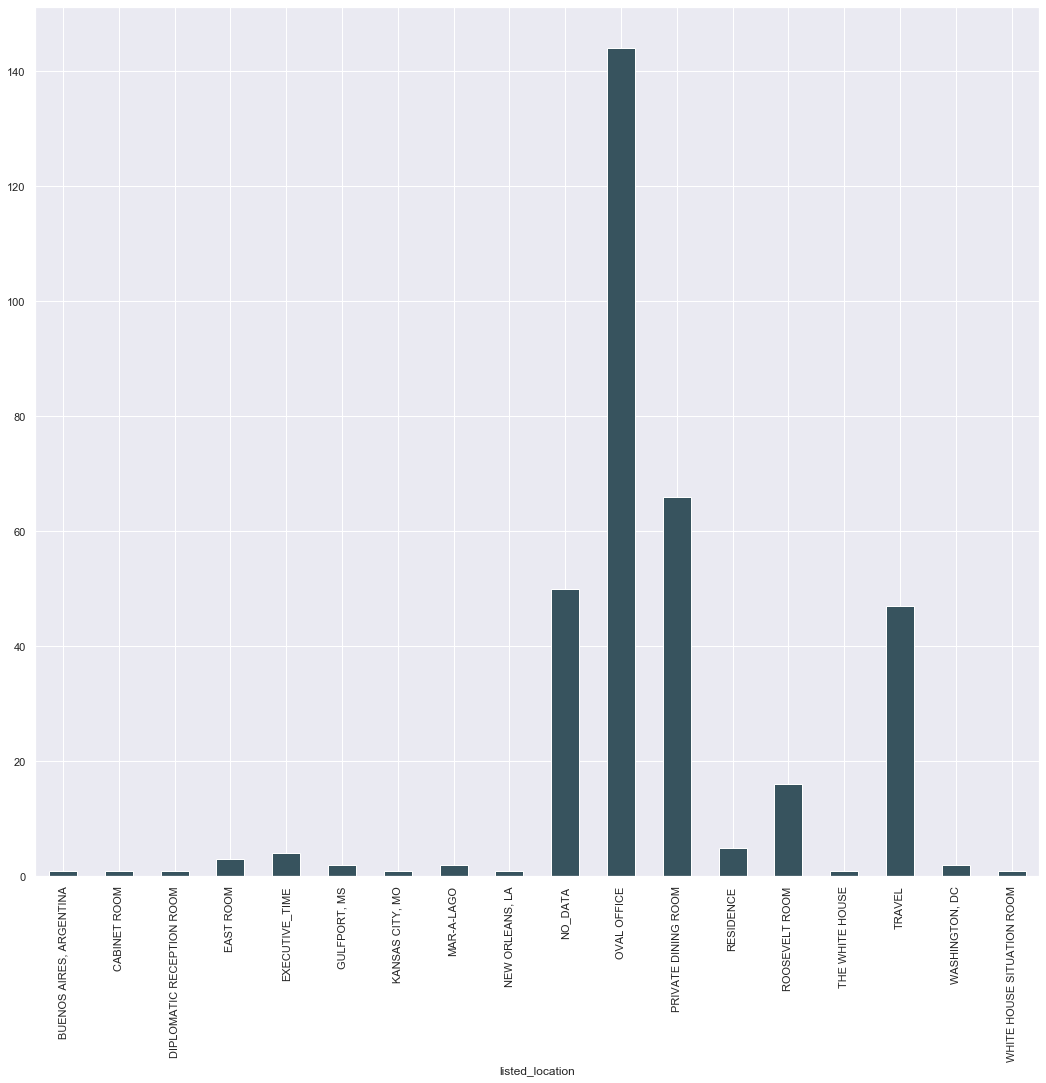

In [247]:
tweet_df.groupby(['listed_location']).top_category.count().plot(kind='bar',figsize =(18,16))

In [248]:
loc_list = tweet_df.groupby(['listed_location']).top_category.count()

In [249]:
loc_list.to_frame()

,top_category
listed_location,
"BUENOS AIRES, ARGENTINA",1
CABINET ROOM,1
DIPLOMATIC RECEPTION ROOM,1
EAST ROOM,3
EXECUTIVE_TIME,4
"GULFPORT, MS",2
"KANSAS CITY, MO",1
MAR-A-LAGO,2
"NEW ORLEANS, LA",1


In [329]:
tweet_df[tweet_df.listed_location == "WHITE HOUSE SITUATION ROOM"]

,source,text,retweet_count,favorite_count,is_retweet,id_str,date,time,hour,week,time_start,time_end,duration,listed_title,top_category,listed_location
233,TWITTER FOR IPHONE,BILLIONS OF DOLLARS ARE SENT TO THE STATE OF C...,27927.0,125765.0,FALSE,1.08302E+18,2019-01-09,15:25:00,15,10.0,15:00:00,16:00:00,1.0,MEETING WITH CONGRESSIONAL LEADERSHIP,MEETING,WHITE HOUSE SITUATION ROOM


In [330]:
time_df= df[['date','time']]

In [331]:
df_5 = time_df.groupby(['date']).count()

In [332]:
df_5.reset_index(inplace=True)

In [333]:
df_6 = df_5.copy()

In [334]:
df_5.head()

,date,time
0,2017-01-20,11
1,2017-01-21,3
2,2017-01-22,4
3,2017-01-23,1
4,2017-01-24,4


In [335]:
def day_of_week(x):
    return calendar.day_name[x.weekday()]

In [336]:
df_5['day'] = df_5.date.apply(day_of_week)

In [337]:
df_5.head()

,date,time,day
0,2017-01-20,11,Friday
1,2017-01-21,3,Saturday
2,2017-01-22,4,Sunday
3,2017-01-23,1,Monday
4,2017-01-24,4,Tuesday


In [338]:
df_mean = df_5.groupby(['day']).time.mean()

In [339]:
df_mean.to_frame()

,time
day,
Friday,10.401639
Monday,8.925000
Saturday,9.758333
Sunday,7.991667
Thursday,9.479339
Tuesday,9.619835
Wednesday,10.918033


In [340]:
days = ["Sunday","Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday"]

In [341]:
df_mean = df_mean.reindex(days, axis=0)

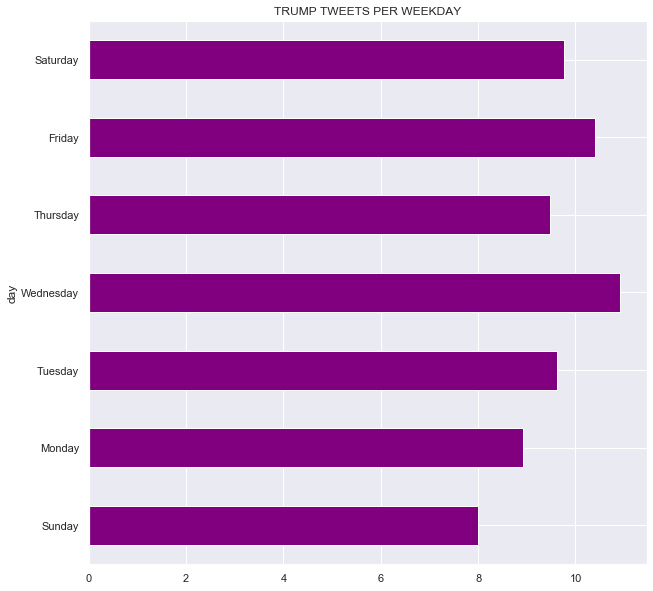

In [342]:
ax = df_mean.plot.barh(x='day',y='time',color='purple',figsize=(10,10),title='TRUMP TWEETS PER WEEKDAY')


In [343]:
df_5['year']= df_5["date"].apply(lambda x: x.year)

In [344]:
df_5['month']= df_5['date'].apply(lambda x: x.month)

In [345]:
df_5['day_']= df_5['date'].apply(lambda x: x.day)

In [346]:
df_5 = df_5.rename(index=str, columns={'time': 'count'})

In [347]:
df_5.drop(columns=['date'],inplace=True)

In [348]:
df_5.head()

,count,day,year,month,day_
0,11,Friday,2017,1,20
1,3,Saturday,2017,1,21
2,4,Sunday,2017,1,22
3,1,Monday,2017,1,23
4,4,Tuesday,2017,1,24


In [349]:
years = [2017, 2018, 2019]

def annual_tweets(df, year):
    new_df = df[df['year']== year]
    new_df = new_df.rename(index=str, columns={f'count': year})
    new_df = new_df.groupby(['day'])[year].mean()
    return new_df

data = {}
for yr in years:
    data[yr] = annual_tweets(df_5, yr)
    

In [350]:
freq_df = pd.DataFrame(data)

In [351]:
freq_df

,2017,2018,2019
day,,,
Friday,8.320000,10.100000,15.818182
Monday,5.612245,9.380000,15.571429
Saturday,7.326531,9.607843,16.100000
Sunday,5.600000,7.755102,14.238095
Thursday,7.895833,10.117647,11.454545
Tuesday,6.918367,11.360000,11.681818
Wednesday,8.367347,11.392157,15.500000


In [352]:
days = ["Sunday","Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday"]

In [353]:
freq_df = freq_df.reindex(days, axis=0)

In [354]:
freq_df

,2017,2018,2019
day,,,
Sunday,5.600000,7.755102,14.238095
Monday,5.612245,9.380000,15.571429
Tuesday,6.918367,11.360000,11.681818
Wednesday,8.367347,11.392157,15.500000
Thursday,7.895833,10.117647,11.454545
Friday,8.320000,10.100000,15.818182
Saturday,7.326531,9.607843,16.100000


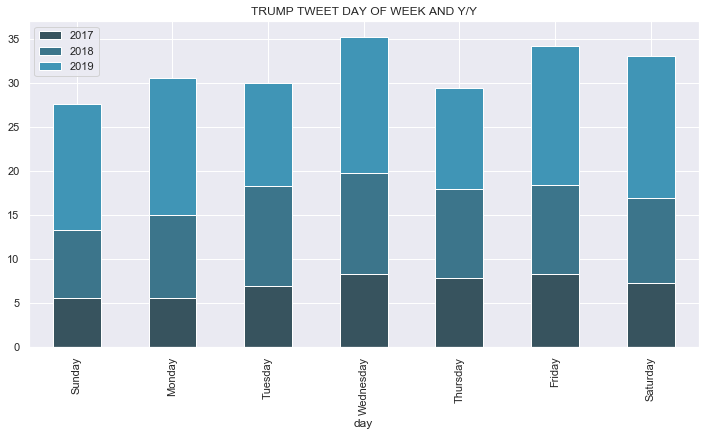

In [355]:
sns.set()
sns.set_palette("GnBu_d")
freq_df.plot(kind='bar', stacked=True, figsize=(12,6), title="TRUMP TWEET DAY OF WEEK AND Y/Y")


In [362]:
by_week = df_6[['date','time']]

In [364]:
by_week = by_week.rename(index=str, columns={'time': 'count'})

In [365]:
by_week['week']= by_week["date"].apply(lambda x: x.isocalendar()[1])

In [366]:
by_week.head()

,date,count,week
0,2017-01-20,11,3
1,2017-01-21,3,3
2,2017-01-22,4,3
3,2017-01-23,1,4
4,2017-01-24,4,4


In [368]:
by_week.groupby(['week'])['count'].mean()

week
1     10.714286
2      9.384615
3     11.352941
4      7.523810
5      6.050000
6      7.000000
7      6.714286
8      7.714286
9      7.100000
10     8.666667
11     9.952381
12     6.100000
13     6.714286
14     7.714286
15     8.350000
16    11.476190
17    10.619048
18    13.600000
19    13.714286
20     9.142857
21    12.047619
22     9.631579
23    10.250000
24     9.428571
25    11.214286
26    11.000000
27     7.214286
28    10.357143
29     8.214286
30    11.642857
31    11.214286
32     8.357143
33    12.071429
34    11.071429
35     9.785714
36     9.642857
37    12.357143
38    13.357143
39    11.615385
40     8.571429
41    11.714286
42    11.714286
43    10.928571
44    14.214286
45    10.714286
46     7.785714
47     6.642857
48    10.785714
49     8.571429
50     6.428571
51     9.857143
52     6.785714
Name: count, dtype: float64

In [369]:
tweet_df[tweet_df['listed_location'] == 'OVAL OFFICE'].listed_title.value_counts()

EXECUTIVE TIME                                                              82
POLICY TIME                                                                 16
INTELLIGENCE BRIEFING                                                        9
MEETING WITH THE CHIEF OF STAFF                                              8
MEETING WITH CHIEF OF STAFF                                                  5
VIDEO RECORDING SESSION                                                      4
MEETING WITH THE SENATE MINORITY LEADER AND THE HOUSE SPEAKER-DESIGNATE      3
PRE-BRIEF                                                                    3
MEETING WITH PRESIDENTIAL PERSONNEL                                          3
MEDIA INTERVIEW                                                              2
WHITE HOUSE MILITARY OFFICE DEPARTURE PHOTOS                                 2
MEETING WITH SENATE REPUBLICAN LEADERSHIP                                    2
MEETING WITH THE SECRETARY OF STATE                 

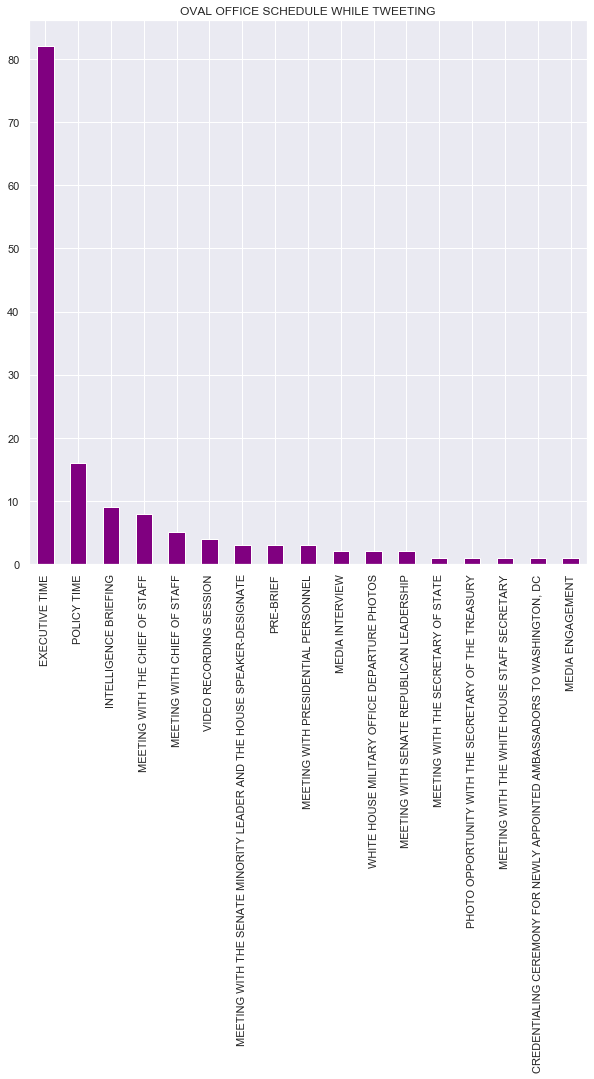

In [370]:
tweet_df[tweet_df['listed_location'] == 'OVAL OFFICE'].listed_title.value_counts().plot(kind='bar',figsize=(10,10),color = 'Purple',title='OVAL OFFICE SCHEDULE WHILE TWEETING')

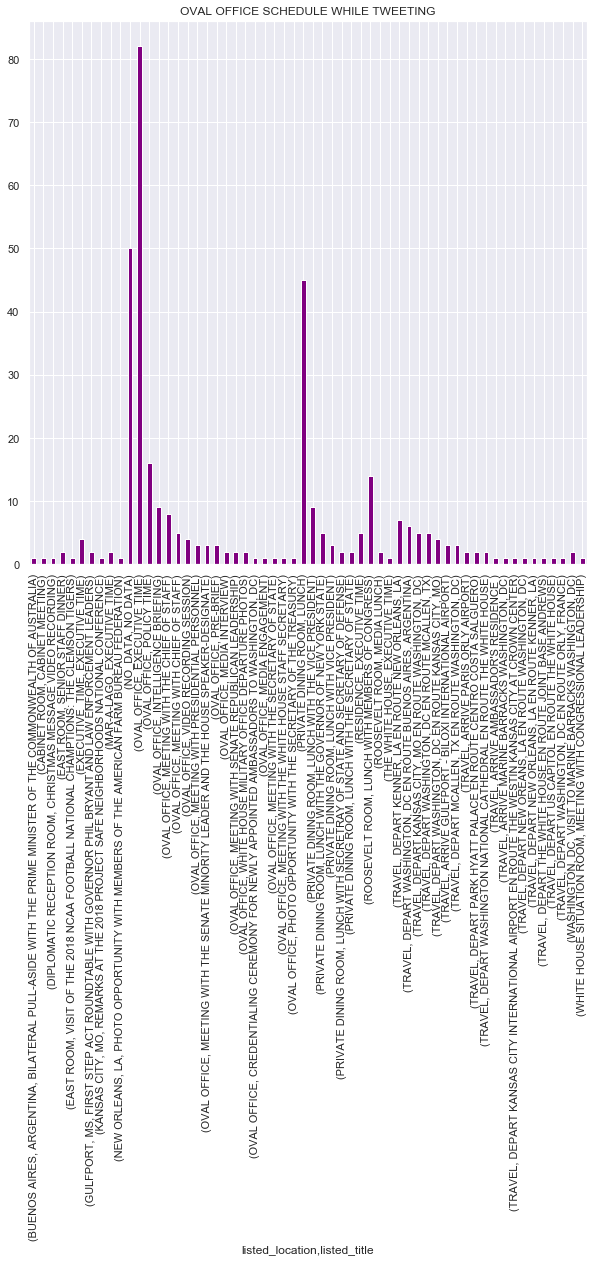

In [371]:
tweet_df.groupby(['listed_location']).listed_title.value_counts().plot(kind='bar',figsize=(10,10),color = 'Purple',title='OVAL OFFICE SCHEDULE WHILE TWEETING')

In [372]:
tweet_df.groupby('listed_location').listed_title.value_counts()

listed_location             listed_title                                                                            
BUENOS AIRES, ARGENTINA     BILATERAL PULL-ASIDE WITH THE PRIME MINISTER OF THE COMMONWEALTH OF AUSTRALIA                1
CABINET ROOM                CABINET MEETING                                                                              1
DIPLOMATIC RECEPTION ROOM   CHRISTMAS MESSAGE VIDEO RECORDING                                                            1
EAST ROOM                   SENIOR STAFF DINNER                                                                          2
                            VISIT OF THE 2018 NCAA FOOTBALL NATIONAL CHAMPTIONS: THE CLEMSON TIGERS                      1
EXECUTIVE_TIME              EXECUTIVE TIME                                                                               4
GULFPORT, MS                FIRST STEP ACT ROUNDTABLE WITH GOVERNOR PHIL BRYANT AND LAW ENFORCEMENT LEADERS              2
KANSAS CITY, MO       

In [374]:
tweet_df.head(2)

,source,text,retweet_count,favorite_count,is_retweet,id_str,date,time,hour,week,time_start,time_end,duration,listed_title,top_category,listed_location
0,TWITTER FOR IPHONE,ACCORDING TO NBC NEWS VOTERS NATIONWIDE DISAPP...,28199.0,122357.0,FALSE,1.06019E+18,2018-11-07,15:39:00,15,1.0,13:30:00,17:00:00,3.5,EXECUTIVE TIME,EXECUTIVE_TIME,OVAL OFFICE
1,TWITTER FOR IPHONE,IN ALL FAIRNESS NANCY PELOSI DESERVES TO BE CH...,18157.0,88740.0,FALSE,1.06016E+18,2018-11-07,13:31:00,13,1.0,13:30:00,17:00:00,3.5,EXECUTIVE TIME,EXECUTIVE_TIME,OVAL OFFICE


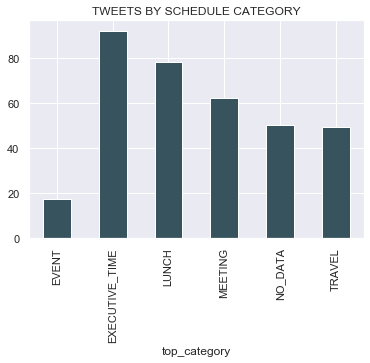

In [375]:
tweet_df.groupby(['top_category']).listed_title.count().plot(kind='bar', title='TWEETS BY SCHEDULE CATEGORY')

In [376]:
tweet_df = tweet_df.replace({'LUNCH WITH VICE PRESIDENT': 'LUNCH WITH THE VICE PRESIDENT'})

In [377]:
tweet_df = tweet_df.replace({'MEETING WITH CHIEF OF STAFF':'MEETING WITH THE CHIEF OF STAFF'})

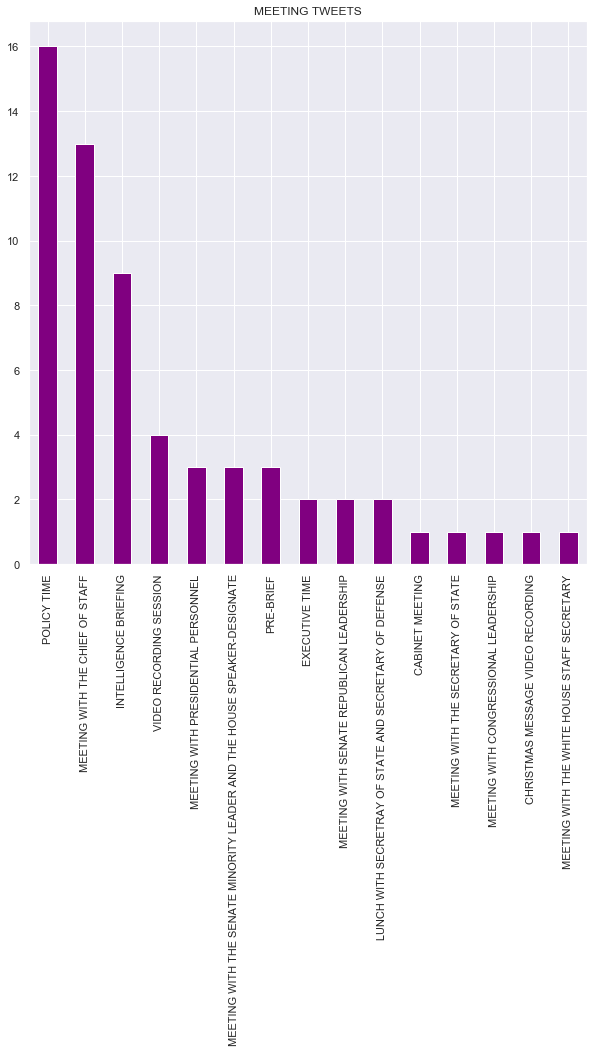

In [378]:
tweet_df[tweet_df['top_category'] == 'MEETING'].listed_title.value_counts().plot(kind ='bar', title= "MEETING TWEETS",figsize=(10,10),color = 'purple')

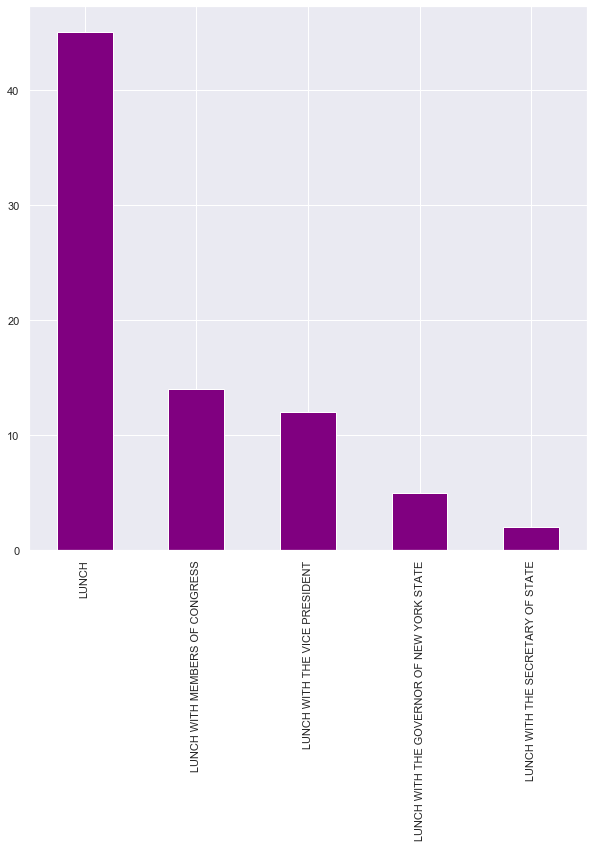

In [379]:

tweet_df[tweet_df['top_category'] == 'LUNCH'].listed_title.value_counts().plot(kind ='bar', figsize=(10,10),color = 'purple')

In [380]:

tweet_df[tweet_df['top_category'] == 'LUNCH']

,source,text,retweet_count,favorite_count,is_retweet,id_str,date,time,hour,week,time_start,time_end,duration,listed_title,top_category,listed_location
2,TWITTER FOR IPHONE,IF THE DEMOCRATS THINK THEY ARE GOING TO WASTE...,45878.0,177925.0,FALSE,1.06016E+18,2018-11-07,13:04:00,13,1.0,12:30:00,13:30:00,1.0,LUNCH,LUNCH,PRIVATE DINING ROOM
3,TWITTER FOR IPHONE,TO ANY OF THE PUNDITS OR TALKING HEADS THAT DO...,29074.0,138690.0,FALSE,1.06015E+18,2018-11-07,12:52:00,12,1.0,12:30:00,13:30:00,1.0,LUNCH,LUNCH,PRIVATE DINING ROOM
5,TWITTER FOR IPHONE,I WILL BE DOING A NEWS CONFERENCE AT THE WHITE...,13464.0,68992.0,FALSE,1.06015E+18,2018-11-07,12:36:00,12,1.0,12:30:00,13:30:00,1.0,LUNCH,LUNCH,PRIVATE DINING ROOM
8,TWITTER FOR IPHONE,I HAVE BEEN FULLY BRIEFED ON THE TERRIBLE SHOO...,19965.0,94326.0,FALSE,1.06051E+18,2018-11-08,12:38:00,12,1.0,12:30:00,13:30:00,1.0,LUNCH,LUNCH,PRIVATE DINING ROOM
9,TWITTER FOR IPHONE,....GREAT BRAVERY SHOWN BY POLICE. CALIFORNIA ...,24628.0,127120.0,FALSE,1.06052E+18,2018-11-08,12:51:00,12,1.0,12:30:00,13:30:00,1.0,LUNCH,LUNCH,PRIVATE DINING ROOM
20,TWITTER FOR IPHONE,ON TRADE FRANCE MAKES EXCELLENT WINE BUT SO DO...,28695.0,119923.0,FALSE,1.06233E+18,2018-11-13,13:07:00,13,2.0,12:30:00,13:30:00,1.0,LUNCH,LUNCH,PRIVATE DINING ROOM
22,TWITTER FOR IPHONE,......MAKE FRANCE GREAT AGAIN!,41695.0,155839.0,FALSE,1.06233E+18,2018-11-13,13:18:00,13,2.0,12:30:00,13:30:00,1.0,LUNCH,LUNCH,PRIVATE DINING ROOM
23,TWITTER FOR IPHONE,THE PROBLEM IS THAT EMMANUEL SUFFERS FROM A VE...,28655.0,108932.0,FALSE,1.06233E+18,2018-11-13,13:17:00,13,2.0,12:30:00,13:30:00,1.0,LUNCH,LUNCH,PRIVATE DINING ROOM
65,TWITTER FOR IPHONE,RT @THE_TRUMP_TRAIN: ILLEGALS CAN GET UP TO $3...,43379.0,0.0,TRUE,1.06778E+18,2018-11-28,13:41:00,13,4.0,12:45:00,13:45:00,1.0,LUNCH WITH THE GOVERNOR OF NEW YORK STATE,LUNCH,PRIVATE DINING ROOM
66,TWITTER FOR IPHONE,RT @THE_TRUMP_TRAIN: IF GM DOESN'T WANT TO KEE...,20711.0,0.0,TRUE,1.06778E+18,2018-11-28,13:40:00,13,4.0,12:45:00,13:45:00,1.0,LUNCH WITH THE GOVERNOR OF NEW YORK STATE,LUNCH,PRIVATE DINING ROOM


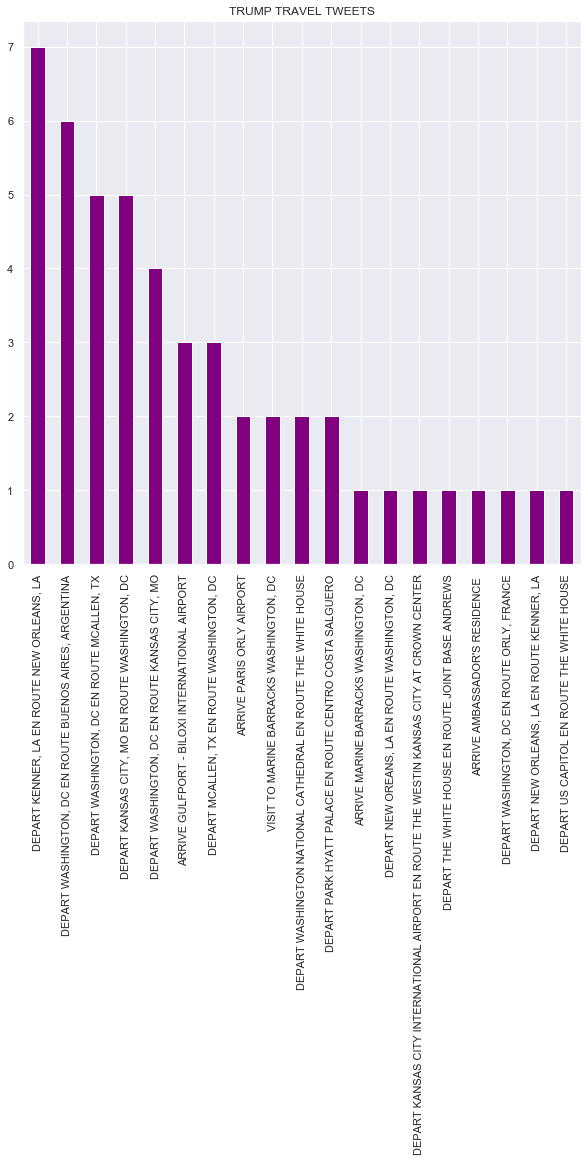

In [381]:
tweet_df[tweet_df['top_category'] == 'TRAVEL'].listed_title.value_counts().plot(kind ='bar', figsize=(10,10),color = 'purple', title='TRUMP TRAVEL TWEETS')

In [382]:
tweet_df[['source','text','date','listed_title','top_category','listed_location']].head(10)

,source,text,date,listed_title,top_category,listed_location
0,TWITTER FOR IPHONE,ACCORDING TO NBC NEWS VOTERS NATIONWIDE DISAPP...,2018-11-07,EXECUTIVE TIME,EXECUTIVE_TIME,OVAL OFFICE
1,TWITTER FOR IPHONE,IN ALL FAIRNESS NANCY PELOSI DESERVES TO BE CH...,2018-11-07,EXECUTIVE TIME,EXECUTIVE_TIME,OVAL OFFICE
2,TWITTER FOR IPHONE,IF THE DEMOCRATS THINK THEY ARE GOING TO WASTE...,2018-11-07,LUNCH,LUNCH,PRIVATE DINING ROOM
3,TWITTER FOR IPHONE,TO ANY OF THE PUNDITS OR TALKING HEADS THAT DO...,2018-11-07,LUNCH,LUNCH,PRIVATE DINING ROOM
4,TWITTER FOR IPHONE,THOSE THAT WORKED WITH ME IN THIS INCREDIBLE M...,2018-11-07,EXECUTIVE TIME,EXECUTIVE_TIME,OVAL OFFICE
5,TWITTER FOR IPHONE,I WILL BE DOING A NEWS CONFERENCE AT THE WHITE...,2018-11-07,LUNCH,LUNCH,PRIVATE DINING ROOM
6,TWITTER FOR IPHONE,RON DESANTIS SHOWED GREAT COURAGE IN HIS HARD ...,2018-11-07,EXECUTIVE TIME,EXECUTIVE_TIME,OVAL OFFICE
7,TWITTER FOR IPHONE,RECEIVED SO MANY CONGRATULATIONS FROM SO MANY ...,2018-11-07,MEETING WITH THE CHIEF OF STAFF,MEETING,OVAL OFFICE
8,TWITTER FOR IPHONE,I HAVE BEEN FULLY BRIEFED ON THE TERRIBLE SHOO...,2018-11-08,LUNCH,LUNCH,PRIVATE DINING ROOM
9,TWITTER FOR IPHONE,....GREAT BRAVERY SHOWN BY POLICE. CALIFORNIA ...,2018-11-08,LUNCH,LUNCH,PRIVATE DINING ROOM


In [391]:
#tweet_df.to_csv(r'~Jen/Code/trump_tweets/cal_tweet.csv')